In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
class Dataset:
    def __init__(self, ds):
        # preprocess dataset, split into training and test part
        self.X, self.y = ds
        self.X = StandardScaler().fit_transform(self.X)
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(self.X, self.y, test_size=.4, random_state=42)
        
        self.x_min, self.x_max = self.X[:, 0].min() - .5, self.X[:, 0].max() + .5
        self.y_min, self.y_max = self.X[:, 1].min() - .5, self.X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(self.x_min, self.x_max, h),
                         np.arange(self.y_min, self.y_max, h))
 

In [3]:
h = .02  # step size in the mesh

classifier_scores={}
highestscore = 0
bestclassifier = ""


# Add classfiers
classifiers = {}

classifiers["Nearest Neighbors"] = KNeighborsClassifier(3)
classifiers["Linear SVM"] = SVC(kernel="linear", C=0.025)
classifiers["RBF SVM"] = SVC(gamma=2, C=1)
classifiers["Gaussian Process"] = GaussianProcessClassifier(1.0 * RBF(1.0))
classifiers["Decision Tree"] = DecisionTreeClassifier(max_depth=5)
classifiers["Random Forest"] = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
classifiers["Neural Nets"] = MLPClassifier(alpha=1, max_iter=1000)
classifiers["AdaBoost"] = AdaBoostClassifier()
classifiers["Naive Bayes"] = GaussianNB()
classifiers["QDA"] = QuadraticDiscriminantAnalysis()

# Create data sets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=3, n_clusters_per_class=1)
rng = np.random.RandomState(1)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.25, random_state=1),
            make_circles(noise=0.3, factor=0.5, random_state=1),
            linearly_separable
            ]
dataset_names = ["Moons", "Circles", "Linearly Seperable"]

# plot information
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


In [4]:
def plot_classified_data(ax, name, tds, ds_cnt):
        clf = classifiers[name]
        clf.fit(tds.X_train, tds.y_train)
        score = clf.score(tds.X_test, tds.y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[tds.xx.ravel(), tds.yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[tds.xx.ravel(), tds.yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(tds.xx.shape)
        ax.contourf(tds.xx, tds.yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(tds.X_train[:, 0], tds.X_train[:, 1], c=tds.y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(tds.X_test[:, 0], tds.X_test[:, 1], c=tds.y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.3)

        ax.set_xlim(tds.xx.min(), tds.xx.max())
        ax.set_ylim(tds.yy.min(), tds.yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_ylabel(name)
            
        ax.set_xlabel(dataset_names[ds_cnt])
        ax.text(tds.xx.max() - .3, tds.yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right')
        return score
    

In [5]:
def plot_datasets(ax, tds):
    # just plot the dataset first


    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(tds.X_train[:, 0], tds.X_train[:, 1], c=tds.y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(tds.X_test[:, 0], tds.X_test[:, 1], c=tds.y_test, cmap=cm_bright, alpha=0.4,
               edgecolors='k')
    ax.set_xlim(tds.xx.min(), tds.xx.max())
    ax.set_ylim(tds.yy.min(), tds.yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [6]:
def evaluate_classifier(clf_name, allds):
    figure = plt.figure(figsize=(27, 9))
    results={}
    scores=[]
    for ds_cnt, ds in enumerate(allds):
        theDataset = Dataset(ds)
        scores.append(plot_classified_data(plt.subplot(len(allds), len(classifiers) + 1, ds_cnt+1), clf_name, theDataset, ds_cnt))
    plt.tight_layout()
    plt.show()
    results['name'] = clf_name
    results['scores'] = scores
    return results

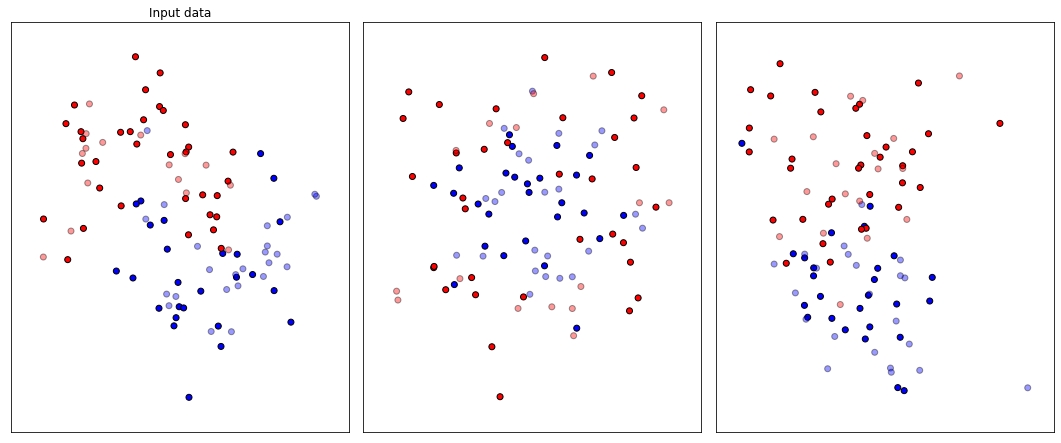

In [7]:
figure = plt.figure(figsize=(54, 18))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    
    theDataset = Dataset(ds)
    plot_datasets(plt.subplot(len(datasets), len(classifiers) + 1, i), theDataset)
    i += 1

plt.tight_layout()
plt.show()

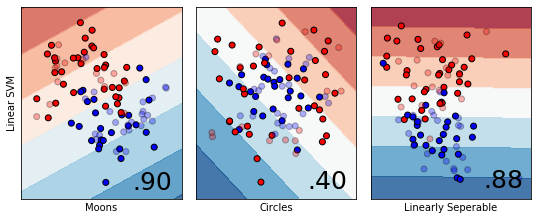

In [8]:
classifier_score_LinearSVM=evaluate_classifier("Linear SVM",datasets)

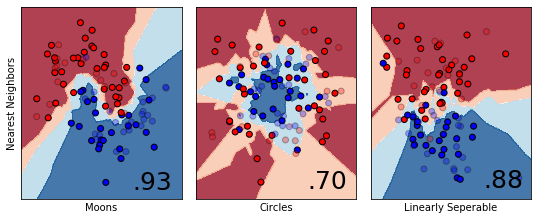

In [9]:
classifier_score_NearestNeighbors=evaluate_classifier("Nearest Neighbors",datasets)

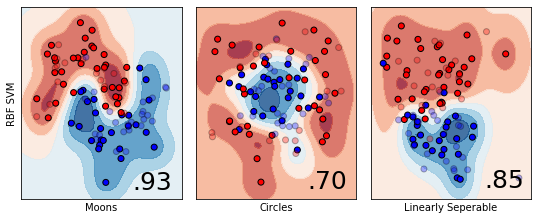

In [10]:
classifier_score_RBFSVM=evaluate_classifier("RBF SVM",datasets)

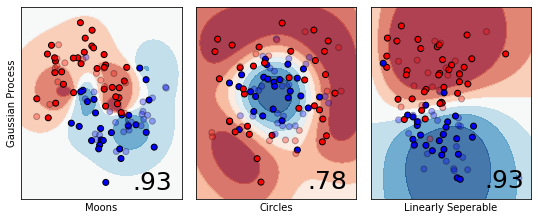

In [11]:
classifier_score_GaussianProcess=evaluate_classifier("Gaussian Process",datasets)

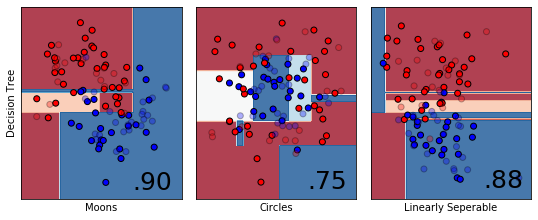

In [12]:
classifier_scores_DecisionTree=evaluate_classifier("Decision Tree",datasets)

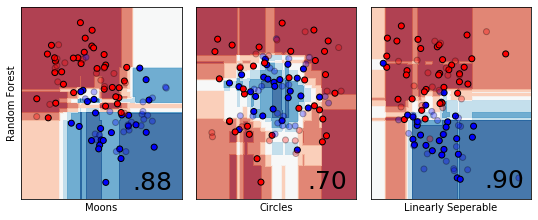

In [13]:
classifier_score_RandomForest=evaluate_classifier("Random Forest",datasets)

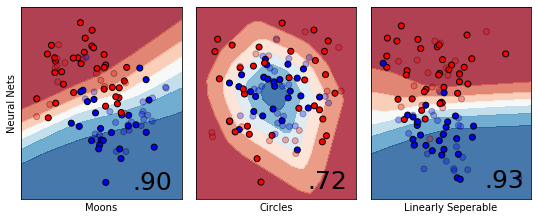

In [14]:
classifier_scores_NeuralNets=evaluate_classifier("Neural Nets",datasets)

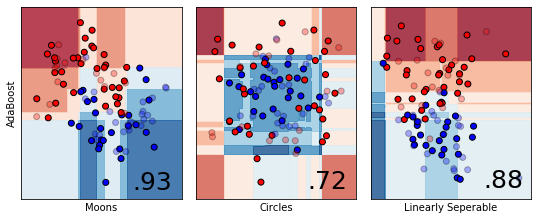

In [15]:
classifier_score_AdaBoost=evaluate_classifier("AdaBoost",datasets)

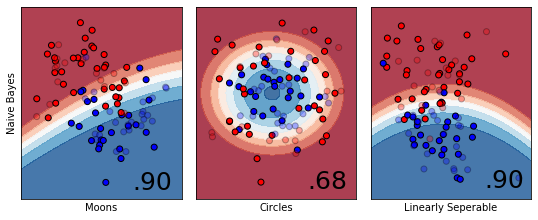

In [16]:
classifier_score_NaiveBayes=evaluate_classifier("Naive Bayes",datasets)

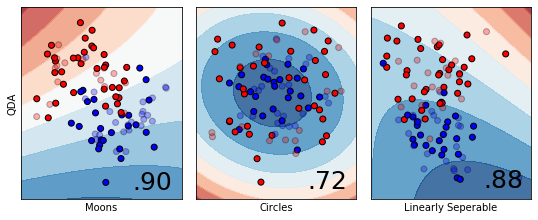

In [17]:
classifier_score_QDA=evaluate_classifier("QDA",datasets)

In [18]:
classifierResults=[classifier_score_QDA, classifier_score_NaiveBayes, classifier_score_AdaBoost, \
                   classifier_scores_NeuralNets, classifier_score_NearestNeighbors, classifier_score_GaussianProcess, \
                  classifier_score_RandomForest, classifier_scores_DecisionTree, classifier_score_LinearSVM, classifier_score_RBFSVM]
highestscore=0
for classifier in classifierResults:
    print("classifier>",classifier)
    sumscores = 0
    for score in classifier['scores']:
        sumscores += score
    if (sumscores > highestscore):
        highestscore = sumscores
        bestclassifier = classifier['name']

print("best classifier ->", bestclassifier)

classifier> {'name': 'QDA', 'scores': [0.9, 0.725, 0.875]}
classifier> {'name': 'Naive Bayes', 'scores': [0.9, 0.675, 0.9]}
classifier> {'name': 'AdaBoost', 'scores': [0.925, 0.725, 0.875]}
classifier> {'name': 'Neural Nets', 'scores': [0.9, 0.725, 0.925]}
classifier> {'name': 'Nearest Neighbors', 'scores': [0.925, 0.7, 0.875]}
classifier> {'name': 'Gaussian Process', 'scores': [0.925, 0.775, 0.925]}
classifier> {'name': 'Random Forest', 'scores': [0.875, 0.7, 0.9]}
classifier> {'name': 'Decision Tree', 'scores': [0.9, 0.75, 0.875]}
classifier> {'name': 'Linear SVM', 'scores': [0.9, 0.4, 0.875]}
classifier> {'name': 'RBF SVM', 'scores': [0.925, 0.7, 0.85]}
best classifier -> Gaussian Process
